# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Fahrurrozi
- **Email:** M.fahrurrozi298@gmail.com
- **ID Dicoding:** fahrurrozi16

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : seller dengan penjualan terbanyak
- Pertanyaan 2 : lokasi seller paling banyak

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
!rm -rf /content/E-CommercePublicDataset

In [107]:
!unzip /content/E-commerce-public-dataset.zip

Archive:  /content/E-commerce-public-dataset.zip
  inflating: E-Commerce Public Dataset/customers_dataset.csv  
  inflating: E-Commerce Public Dataset/geolocation_dataset.csv  
 extracting: E-Commerce Public Dataset/New Text Document.txt  
  inflating: E-Commerce Public Dataset/order_items_dataset.csv  
  inflating: E-Commerce Public Dataset/order_payments_dataset.csv  
  inflating: E-Commerce Public Dataset/order_reviews_dataset.csv  
  inflating: E-Commerce Public Dataset/orders_dataset.csv  
  inflating: E-Commerce Public Dataset/product_category_name_translation.csv  
  inflating: E-Commerce Public Dataset/products_dataset.csv  
  inflating: E-Commerce Public Dataset/sellers_dataset.csv  


## Data Wrangling

### Gathering Data

In [109]:
customer_df = pd.read_csv('/content/E-Commerce Public Dataset/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [110]:
order_df = pd.read_csv('/content/E-Commerce Public Dataset/orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [111]:
order_items_df = pd.read_csv('/content/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [112]:
sellers_df = pd.read_csv('/content/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [113]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [114]:
customer_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [115]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


In [116]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- xxx
- xxx

In [117]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [105]:
order_df['order_approved_at'] = order_df['order_approved_at'].ffill()

In [119]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
order_df.order_approved_at.value_counts()

In [ ]:
order_df.nunique()

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


In [ ]:
print("Jumlah duplikasi: ",order_df.duplicated().sum())
order_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [92]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [93]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [ ]:
customer_df.duplicated().sum()

0

In [ ]:
customer_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
order_df.duplicated().sum()

0

In [ ]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

In [ ]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [96]:
sellers_df.duplicated().sum()

0

In [97]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [98]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [56]:
order_items_df.duplicated().sum()

0

In [57]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

### Explore Customer_df

In [58]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
51042,27d1cf404f0460a10612b45cee7f8821,b854c56e1163bced9c3ebf1e4a6576f3,36021,juiz de fora,MG
43421,42510cf6f88a1b5a38b09f09867c1f8d,5d0a9c06d5c91117e621b874d8f60470,30285,belo horizonte,MG
77195,e36a9aa169049e117a9f775f945bc6ca,dd039ee577bae280abdeb92322f04a49,28500,cantagalo,RJ
47273,baaf1a11dbfaa1f27b2a6560f67f1eba,f8d1720cca57b3c6961eb25114347ade,12411,pindamonhangaba,SP
79275,70dadea89e8294361606fe742fceabec,5880e398144a5fc8dbcd185521e3f6bc,95560,torres,RS


In [59]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [60]:
customer_df.customer_id.is_unique

True

In [63]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [64]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore order_df


In [94]:
order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
69321,49c8d7acf28d999e86d3cf817d9793e0,3fe1b830cda03960fa7abad76397bc25,delivered,2017-05-24 14:06:49,2017-05-24 14:15:20,2017-05-25 14:35:58,2017-05-26 10:37:57.000,2017-06-08
85266,dcb51dcb7db5cd9a3d44ebf6002bc080,da39612672f966a88588320e7dbacc0d,delivered,2017-08-04 12:51:21,2017-08-05 02:55:30,2017-08-07 13:27:32,2017-08-11 16:42:28.000,2017-08-24
75213,9a0b56e930f6e5cd70a4662400e4e6b5,dcdc9c7e585f8d8992ea33d72b924a64,delivered,2017-10-15 23:18:35,2017-10-15 23:28:12,2017-10-16 22:33:02,2017-10-19 18:27:40.000,2017-11-07
27253,c6697f0b5a341cb2e357e996c100664a,dea8d18a25a01a5e5662e64b4a9be87c,shipped,2017-12-01 11:09:24,2017-12-02 02:39:22,2017-12-08 23:56:56,2018-02-02 19:28:10.500,2017-12-28
10980,dc198e42fd1b02634e6215c5a60de234,bbf4de25155f25cc5559953548b3829e,delivered,2017-08-22 13:33:36,2017-08-22 13:46:28,2017-08-22 19:51:47,2017-09-04 21:07:40.000,2017-09-14


In [95]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


### Explore order_items


In [125]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
59335,8738785542fcbf848621d353326ec75d,1,586328f570ac0b651d452f1227db4d1c,522620dcb18a6b31cd7bdf73665113a9,2018-04-16 00:15:31,79.0,12.91
105566,efd36975d7d35f5e51dc4e13aabc0f2d,1,a94db861b4ea1c79704586f07c8cdbc3,32b8764b4ef628b53608fc34011fcc13,2018-05-10 03:31:11,349.0,20.32
105248,ef200b21ae2bbae5122b5c5c75dcbce8,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2017-09-04 04:51:04,59.9,17.67
33723,4c5ad8021308604b11f7badf742189dc,1,541d7793096f512080b5b5c25ce3c44f,e9d99831abad74458942f21e16f33f92,2017-11-03 19:46:39,8.5,17.63
60256,89561bab2f540ec47002eb8e0fbec2a8,1,ef2eed3e42cdbeedcd515745b23d7ccf,e9779976487b77c6d4ac45f75ec7afe9,2017-10-19 21:14:22,63.0,8.27


In [ ]:
order_items_df.isna().sum()

**Insight:**
- xxx
- xxx

In [120]:
orders_customers_df = pd.merge(
    left=order_df,
    right=customer_df,
    how="left",
    on="customer_id"
)

In [122]:
order_item_seller_df = pd.merge(
    left=order_items_df,
    right=seller_df,
    how="left",
    on="seller_id"
)

In [124]:
all_df = pd.merge(
    left=order_item_seller_df,
    right=orders_customers_df,
    how="left",
    on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [127]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [128]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

In [130]:
all_df['order_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')

In [131]:
seller_sales = all_df.groupby(['seller_id', 'order_month']).agg(total_sales=('price', 'sum')).reset_index()

In [132]:
top_seller_monthly = seller_sales.sort_values('total_sales', ascending=False).groupby('order_month').first().reset_index()

In [133]:
print(top_seller_monthly)

   order_month                         seller_id  total_sales
0      2016-09  ecccfa2bb93b34a3bf033cc5d1dcdc69       134.97
1      2016-10  620c87c171fb2a6dd6e8bb4dec959fc6      5797.10
2      2016-12  48efc9d94a9834137efd9ea76b065a38        10.90
3      2017-01  76d5af76d0271110f9af36c92573f765      5179.79
4      2017-02  7e93a43ef30c4f03f38b393420bc753a      9404.80
5      2017-03  7e93a43ef30c4f03f38b393420bc753a     14320.50
6      2017-04  59417c56835dd8e2e72f91f809cd4092     18666.00
7      2017-05  7e93a43ef30c4f03f38b393420bc753a     25401.47
8      2017-06  b1b3948701c5c72445495bd161b83a4c     18759.71
9      2017-07  37be5a7c751166fbc5f8ccba4119e043     18874.99
10     2017-08  53243585a1d6dc2643021fd1853d8905     34576.00
11     2017-09  53243585a1d6dc2643021fd1853d8905     64337.56
12     2017-10  53243585a1d6dc2643021fd1853d8905     41708.00
13     2017-11  46dc3b2cc0980fb8ec44634e21d2718e     22188.84
14     2017-12  fa1c13f2614d7b5c4749cbc52fecda94     22526.61
15     2

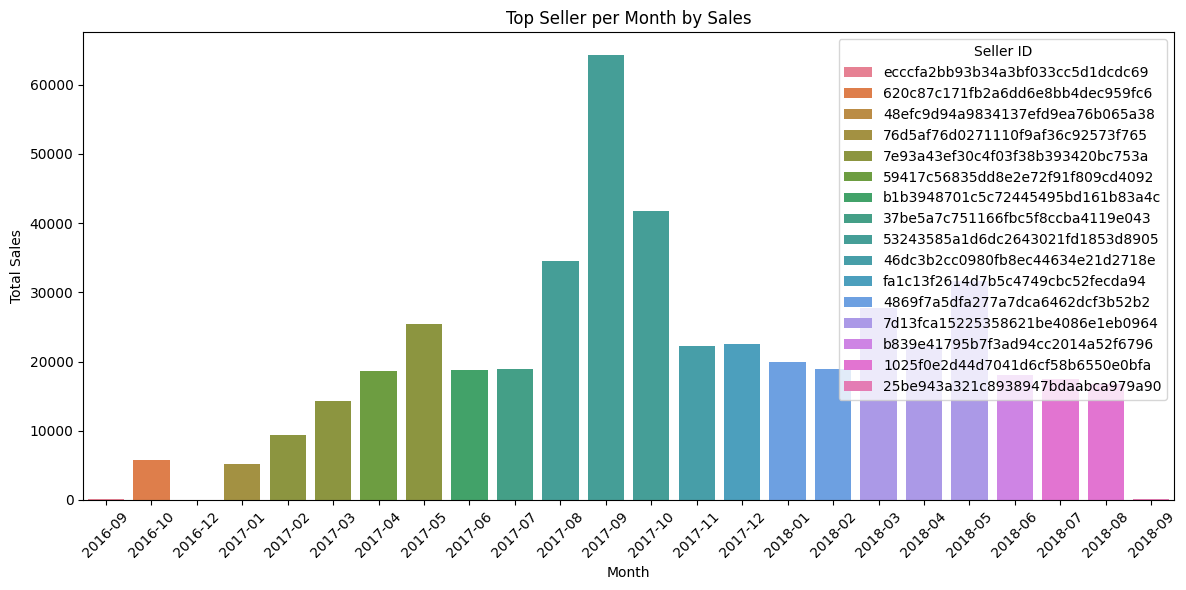

In [134]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_seller_monthly, x='order_month', y='total_sales', hue='seller_id')
plt.title('Top Seller per Month by Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Seller ID', loc='upper right')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

In [135]:
seller_location = all_df[['seller_id', 'seller_city']].drop_duplicates()

In [136]:
seller_per_city = seller_location.groupby('seller_city').agg(total_sellers=('seller_id', 'count')).reset_index()

In [137]:
seller_per_city = seller_per_city.sort_values(by='total_sellers', ascending=False)

In [138]:
print(seller_per_city.head(10))

        seller_city  total_sellers
517       sao paulo            694
159        curitiba            127
450  rio de janeiro             96
64   belo horizonte             68
442  ribeirao preto             52
220       guarulhos             50
227        ibitinga             49
483     santo andre             45
101        campinas             41
325         maringa             40


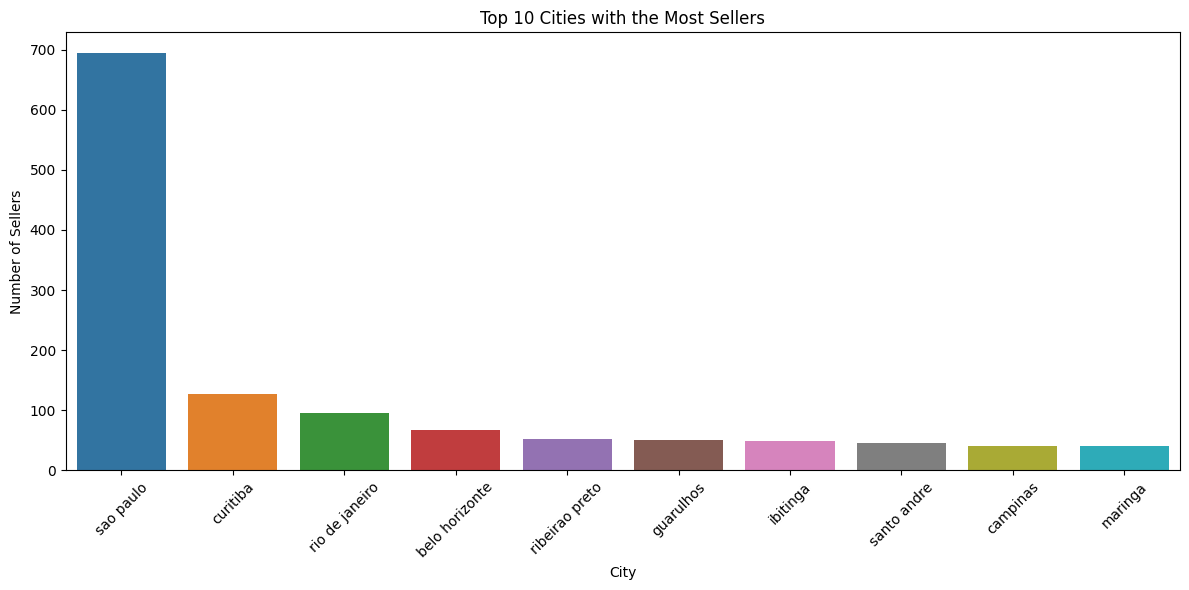

In [140]:
plt.figure(figsize=(12, 6))
sns.barplot(data=seller_per_city.head(10), x='seller_city', y='total_sellers', hue='seller_city', dodge=False, legend=False)
plt.title('Top 10 Cities with the Most Sellers')
plt.xlabel('City')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [145]:
latest_date = all_df['order_purchase_timestamp'].max()

In [147]:
rfm_recency = all_df.groupby('customer_unique_id').agg(
    recency=('order_purchase_timestamp', lambda x: (latest_date - x.max()).days)
).reset_index()

In [148]:
rfm_frequency = all_df.groupby('customer_unique_id').agg(
    frequency=('order_id', 'count')
).reset_index()

In [149]:
rfm_monetary = all_df.groupby('customer_unique_id').agg(
    monetary=('price', 'sum')
).reset_index()

In [150]:
rfm_df = pd.merge(rfm_recency, rfm_frequency, on='customer_unique_id')
rfm_df = pd.merge(rfm_df, rfm_monetary, on='customer_unique_id')
print(rfm_df.head())

                 customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90
2  0000f46a3911fa3c0805444483337064      541          1     69.00
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99
4  0004aac84e0df4da2b147fca70cf8255      292          1    180.00


In [151]:
rfm_df['R_score'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F_score'] = pd.qcut(rfm_df['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_df['M_score'] = pd.qcut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4])

In [152]:
rfm_df['RFM_score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

In [153]:
print(rfm_df.head())

                 customer_unique_id  recency  frequency  monetary R_score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90       4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90       4   
2  0000f46a3911fa3c0805444483337064      541          1     69.00       1   
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99       2   
4  0004aac84e0df4da2b147fca70cf8255      292          1    180.00       2   

  F_score M_score RFM_score  
0       1       3       413  
1       1       1       411  
2       1       2       112  
3       1       1       211  
4       1       4       214  


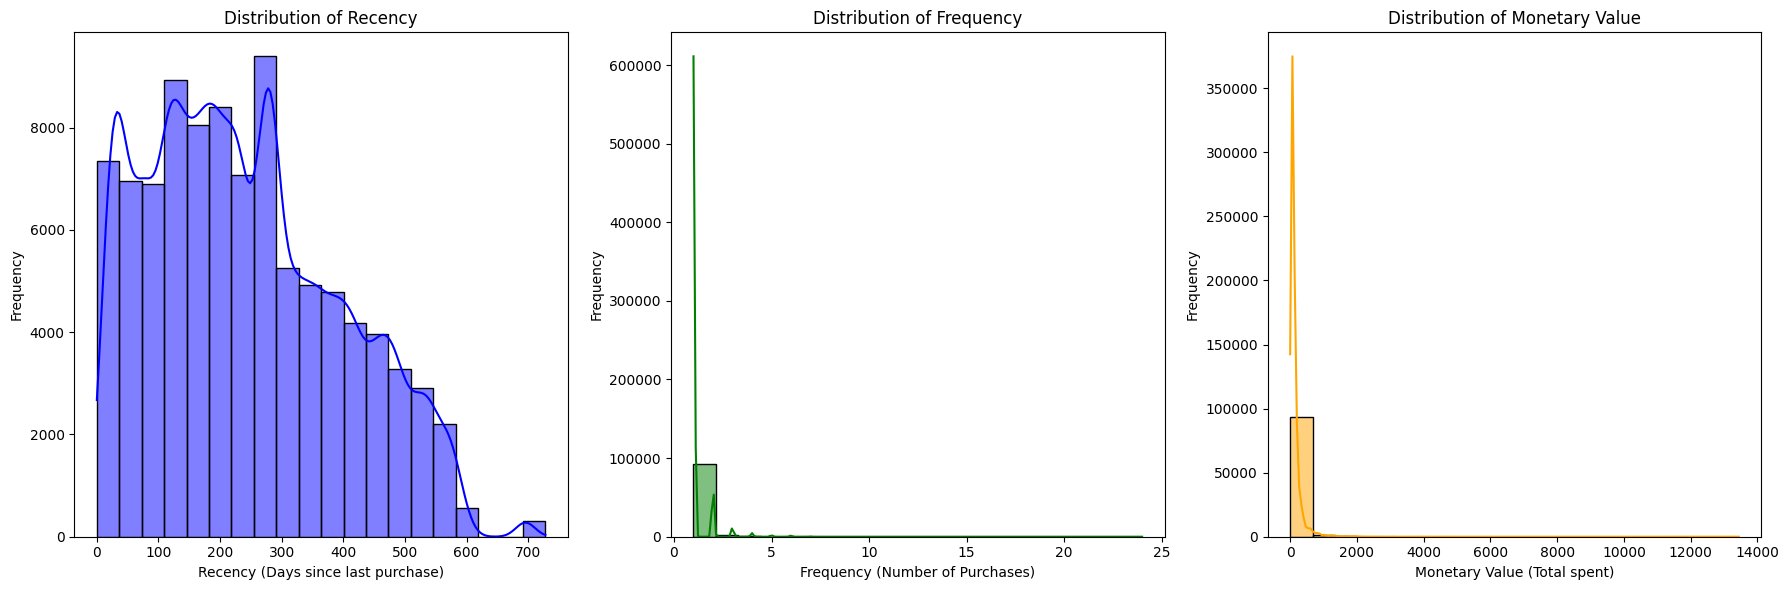

In [155]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['recency'], bins=20, kde=True, color='blue')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['frequency'], bins=20, kde=True, color='green')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (Number of Purchases)')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['monetary'], bins=20, kde=True, color='orange')
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value (Total spent)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1
Seller dengan ID 53243585a1d6dc2643021fd1853d8905 merupakan penjual yang paling aktif dan menghasilkan total penjualan tertinggi dalam beberapa bulan, khususnya pada bulan Agustus 2017 dan September 2017.

- Conclution pertanyaan 2
Sao Paulo adalah kota dengan jumlah seller terbanyak, mencatatkan 694 seller. Hal ini menunjukkan bahwa Sao Paulo merupakan pusat bisnis dan perdagangan yang signifikan di wilayah ini.